<H1> This notebook will be used for IBM Data Science Capstone project

In [54]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


<H2> Introduction

<H3> Background: </H3>

According to cdc.gov (https://www.cdc.gov/injury/features/global-road-safety/index.html), "Road traffic crashes are a leading cause of death in the United States for people 
aged 1–54 and the leading cause of non-natural death for healthy U.S. citizens residing or traveling abroad...
Each year, 1.35 million people are killed on roadways around the world.
Every day, almost 3,700 people are killed globally in road traffic crashes involving cars, buses, motorcycles, bicycles, trucks, or pedestrians. More than half of those 
killed are pedestrians, motorcyclists, and cyclists.
Road traffic injuries are estimated to be the eighth leading cause of death globally for all age groups and the leading cause of death for children and young people 5–29 years 
of age. More people now die in road traffic crashes than from HIV/AIDS."

With the increasing number of vehicles that hit the road every year, the number of accidents and fatalities is only expected
to increase. The reduction of accidents is hence of immense importance to people, healthcare organizations, private corporations and government bodies across the world to 
prevent the tragic loss of life, limb and property.
The Seattle Police Department maintains a record of all the car collision incidents that occur within its jurisdictional limits, which is updated weekly on its website. 
An analysis of the car collision dataset may reveal interesting observations and patterns regarding the occurrence of car collisions, such as:
 <ul class="a">
 <li>Days of week which are more prone to accidents.</li>
 <li>Time of the day in which accidents are more likely to occur.</li>
 <li>Accident prone localities and streets.</li>
 <li>Whether some areas have a high occurrence of accidents during nighttime.</li>
 <li>Whether weather conditions affect the occurrence/severity of accidents.</li>
 <li>Whether road conditions affect the occurrence/severity of accidents.</li>


<H3> Audience: </H3>

The analysis could be of particular interest to:
 <ul class="a">
 <li>Traffic departments and civic agencies who might be looking for ways to reduce the accidents and resulting 
 injuries/fatalities by identifying zones and situations which have a higher incidence of collisions and help them take appropriate measures for the same. </li>
 <li>Residents, drivers and pedestrians who could be warned about the likelihood of an accident on their travel route based on the location, weather, road conditions, etc.</li>
© 2020 GitHub, Inc.

<H2> Data description </H2>

The Data-Collisions.csv dataset has 194673 rows and 38 columns. Each accident has an unique primary and secondary key. Each accident location is uniquely identified through ESRI 
unique identifiers and geometry fields. Description of the general location of the accident site, type of the address(whether it is an alley/block/intersection), codes identifying
the lane/crosswalk are also available in addition to the time and date of the accident.
The severity of the accident is denoted by the severity code. The type of collision, the number of people and vehicles involved, total number of injuries, further segregated by 
serious injuries and fatalities are also available.
The role of the driver in the accident, whether it was due to inattention, intoxication, weather/road conditions, speeding, whether right of way was given to pedestrian and 
whether it involved colliding with a parked car is also available in the dataset.
A few more columns are also available in the dataset which do not seem to be very useful and would be dropped for the purpose of the analysis.

The dataset can be downloaded at this <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv">link</a>. The metadata can be downloaded <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf">here</a>

The dataset summary can be found below:

In [55]:
df=pd.read_csv('Data-Collisions.csv')
df_copy=df

In [56]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [58]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


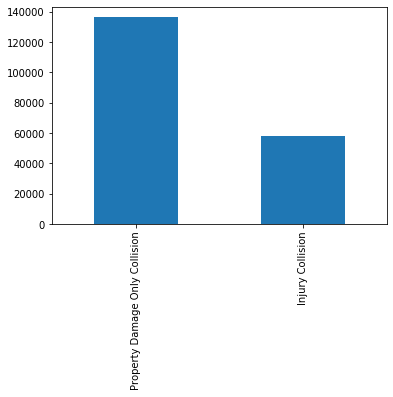

In [59]:
df['SEVERITYDESC'].value_counts().plot(kind='bar')


In [60]:
import datetime as dt
df['INCDTTM']=pd.to_datetime(df['INCDTTM'])
df['year']=df['INCDTTM'].dt.year
df['month']=df['INCDTTM'].dt.month
df['hour']=df['INCDTTM'].dt.hour
df['dayofweek']=df['INCDTTM'].dt.dayofweek



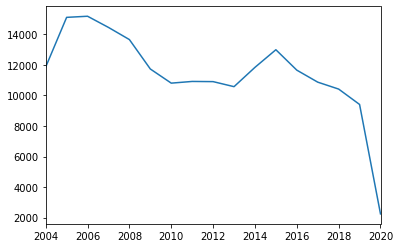

In [61]:
df['year'].value_counts().sort_index().plot()

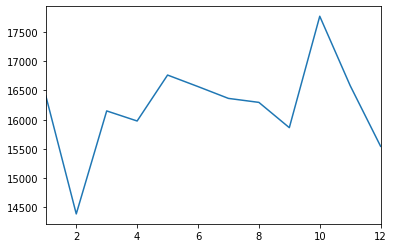

In [62]:
df['month'].value_counts().sort_index().plot()

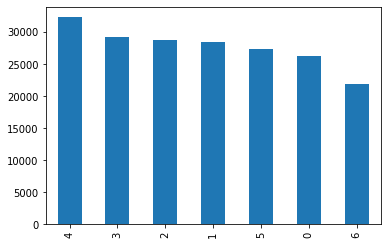

In [85]:
df['dayofweek'].value_counts().plot(kind='bar')

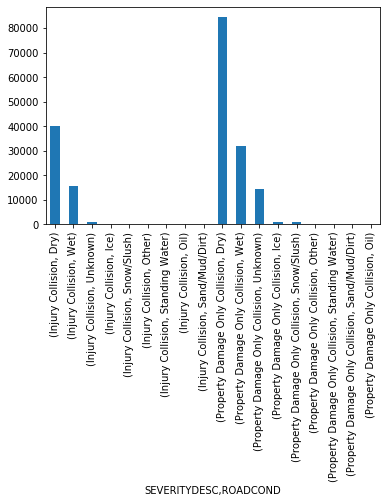

In [64]:
df.groupby(['SEVERITYDESC'])['ROADCOND'].value_counts().plot(kind='bar')

In [65]:
df.groupby(['SEVERITYDESC'])['LIGHTCOND'].value_counts()

SEVERITYDESC                    LIGHTCOND               
Injury Collision                Daylight                    38544
                                Dark - Street Lights On     14475
                                Dusk                         1944
                                Dawn                          824
                                Unknown                       605
                                Dark - No Street Lights       334
                                Dark - Street Lights Off      316
                                Other                          52
                                Dark - Unknown Lighting         4
Property Damage Only Collision  Daylight                    77593
                                Dark - Street Lights On     34032
                                Unknown                     12868
                                Dusk                         3958
                                Dawn                         1678
                   

In [66]:
df.groupby(['SEVERITYDESC'])['WEATHER'].value_counts()

SEVERITYDESC                    WEATHER                 
Injury Collision                Clear                       35840
                                Raining                     11176
                                Overcast                     8745
                                Unknown                       816
                                Fog/Smog/Smoke                187
                                Snowing                       171
                                Other                         116
                                Sleet/Hail/Freezing Rain       28
                                Blowing Sand/Dirt              15
                                Severe Crosswind                7
                                Partly Cloudy                   3
Property Damage Only Collision  Clear                       75295
                                Raining                     21969
                                Overcast                    18969
                   

In [67]:
df.groupby(['SEVERITYDESC'])['PEDCYLCOUNT'].value_counts()

SEVERITYDESC                    PEDCYLCOUNT
Injury Collision                0               53383
                                1                4762
                                2                  43
Property Damage Only Collision  0              135806
                                1                 679
Name: PEDCYLCOUNT, dtype: int64

In [68]:
df.groupby(['SEVERITYDESC'])['PEDCOUNT'].value_counts()

SEVERITYDESC                    PEDCOUNT
Injury Collision                0            51947
                                1             6007
                                2              207
                                3               21
                                4                4
                                5                1
                                6                1
Property Damage Only Collision  0           135787
                                1              678
                                2               19
                                3                1
Name: PEDCOUNT, dtype: int64

In [69]:
df['UNDERINFL']=df['UNDERINFL'].replace(np.nan, "0")
df['UNDERINFL']=df['UNDERINFL'].replace("N", "0")
df['UNDERINFL']=df['UNDERINFL'].replace("Y", "1")
df['UNDERINFL']=df['UNDERINFL'].astype("int64", errors='ignore')
df.groupby(['SEVERITYDESC'])['UNDERINFL'].value_counts()

SEVERITYDESC                    UNDERINFL
Injury Collision                0             54626
                                1              3562
Property Damage Only Collision  0            130926
                                1              5559
Name: UNDERINFL, dtype: int64

In [70]:
df.groupby(['SEVERITYDESC'])['SPEEDING'].value_counts()

SEVERITYDESC                    SPEEDING
Injury Collision                Y           3531
Property Damage Only Collision  Y           5802
Name: SPEEDING, dtype: int64

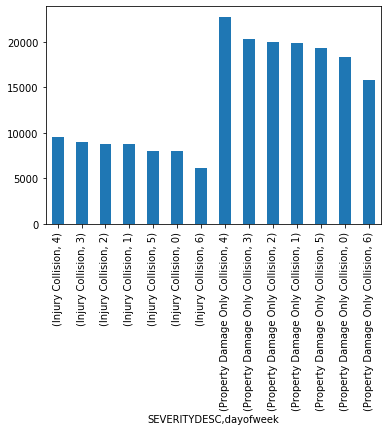

In [71]:
df.groupby(['SEVERITYDESC'])['dayofweek'].value_counts().plot(kind='bar')

In [72]:
df.groupby(['SEVERITYDESC'])['VEHCOUNT'].value_counts()

SEVERITYDESC                    VEHCOUNT
Injury Collision                2            35949
                                1            14105
                                3             5470
                                0             1227
                                4             1078
                                5              261
                                6               60
                                7               22
                                9                6
                                8                5
                                11               3
                                10               2
Property Damage Only Collision  2           111701
                                1            11643
                                3             7540
                                0             3858
                                4             1348
                                5              268
                                6        

In [73]:
df.groupby(['SEVERITYDESC'])['hour'].value_counts()

SEVERITYDESC                    hour
Injury Collision                0        9252
                                17       4498
                                16       4012
                                15       3741
                                14       3370
                                18       3332
                                13       3085
                                12       2986
                                8        2692
                                9        2410
                                11       2401
                                19       2287
                                7        2154
                                10       2139
                                20       1750
                                21       1617
                                22       1525
                                23       1109
                                6        1017
                                2         870
                                1         8

In [74]:
df.groupby(['SEVERITYDESC'])['ADDRTYPE'].value_counts()

SEVERITYDESC                    ADDRTYPE    
Injury Collision                Block           30096
                                Intersection    27819
                                Alley              82
Property Damage Only Collision  Block           96830
                                Intersection    37251
                                Alley             669
Name: ADDRTYPE, dtype: int64

In [75]:
df.groupby(['SEVERITYDESC'])['LOCATION'].value_counts()

SEVERITYDESC                    LOCATION                                                                            
Injury Collision                AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          120
                                6TH AVE AND JAMES ST                                                                    107
                                N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                                 94
                                RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                    94
                                AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                                           88
                                BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                           86
                                BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                           78
               

In [76]:
df.groupby(['SEVERITYDESC'])['JUNCTIONTYPE'].value_counts()

SEVERITYDESC                    JUNCTIONTYPE                                     
Injury Collision                At Intersection (intersection related)               27174
                                Mid-Block (not related to intersection)              19404
                                Mid-Block (but intersection related)                  7297
                                Driveway Junction                                     3234
                                At Intersection (but not related to intersection)      623
                                Ramp Junction                                           54
                                Unknown                                                  2
Property Damage Only Collision  Mid-Block (not related to intersection)              70396
                                At Intersection (intersection related)               35636
                                Mid-Block (but intersection related)                 15493
        

In [77]:
df.groupby(['SEVERITYDESC'])['ST_COLCODE'].value_counts()

SEVERITYDESC                    ST_COLCODE
Injury Collision                10            9299
                                14            7348
                                10            4325
                                14            4020
                                28            3149
                                45            2741
                                50            2191
                                13            2102
                                0             1760
                                32            1491
                                28            1482
                                2             1408
                                45            1381
                                11            1208
                                50            1100
                                              1028
                                13             952
                                0              807
                                1      

In [78]:
df.groupby(['SEVERITYDESC'])['ST_COLDESC'].value_counts()

SEVERITYDESC                    ST_COLDESC                                                                           
Injury Collision                Entering at angle                                                                        13624
                                From same direction - both going straight - one stopped - rear-end                       11368
                                From opposite direction - one left turn - one straight                                    4631
                                Vehicle - Pedalcyclist                                                                    4122
                                Fixed object                                                                              3291
                                From same direction - both going straight - both moving - rear-end                        3054
                                Vehicle going straight hits pedestrian                                                  

From the above preliminary analysis, we observe that:
<ul class="a">
    <li>The number of accidents is showing a decreasing trend since 2015.</li>
    <li>Road conditions, light conditions, speeding and sobriety of the driver do not seem to affect the number of accidents since the highest number of accidents seem to occur on dry roads, during daylight, in clear weather and when the driver is sober.</li>
    <li>Most accidents seem to occur on Fridays (as dayofweek 0=Monday).</li>
    <li>There seems to be a spike in accidents at 00 hours. This could be because a lot of accidents do not have the time of incident recorded, which are recorded by default as at 00 hours</li>
    <li>Most accidents involving physical injury are caused due to vehicles entering at an angle, followed by those due to rear-ending while most accidents involving property damage are caused due to railway vehicles striking the vehicle or due to head-on collisions</li>
    <li>Highest number of accidents have occurred when the sky is clear, followed by rainy and overcast weather</li>
    <li>Both Injury and Property damage only collisions are frequently occurring at Intersection (intersection related), Mid-Block (not related to intersection) and Mid-Block (but intersection related)</li>
    <li>There are some locations which are more prone to injury collisions but property damage related collisions seem to be evenly distributed between locations</li>
    


In [79]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL              0
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
year                   0
month                  0


In [80]:
features=['SEVERITYCODE', 'ADDRTYPE', 'ADDRTYPE_INT', 'LOCATION', 'LOCATION_INT', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', \
          'VEHCOUNT','month', 'hour', 'dayofweek', 'JUNCTIONTYPE', 'JUNCTIONTYPE_INT','WEATHER', 'WEATHER_INT', 
          'ROADCOND','ROADCOND_INT','LIGHTCOND', 'LIGHTCOND_INT']



In [81]:
#Converting all columns of our interest into integers

df['WEATHER'] = df['WEATHER'].replace("Other", "Unknown")
df['WEATHER'] = df['WEATHER'].replace(np.nan, "Unknown")
df['WEATHER_INT'] = df['WEATHER'].replace({'Clear': '1', 
                                                      'Partly Cloudy': '2', 
                                                      'Overcast': '3', 
                                                      'Severe Crosswind': '4', 
                                                      'Raining':'6',
                                                      'Blowing Sand/Dirt':'7',
                                                      'Sleet/Hail/Freezing Rain': '8',
                                                      'Fog/Smog/Smoke':'9',
                                                      'Snowing':'10',
                                                      'Unknown':'5',               
                                                     })
df['WEATHER_INT'] = df['WEATHER_INT'].astype("int64", errors='ignore')


df['ROADCOND'] = df['ROADCOND'].replace("Other", "Unknown")
df['ROADCOND'] = df['ROADCOND'].replace(np.nan, "Unknown")
df['ROADCOND_INT'] = df['ROADCOND'] .replace({'Dry': '1', 
                                                      'Sand/Mud/Dirt': '2', 
                                                      'Wet': '3', 
                                                      'Unknown': '4', 
                                                      'Standing Water':'5',
                                                      'Snow/Slush':'6',
                                                      'Ice': '7',
                                                      'Oil':'8',              
                                                     })
df['ROADCOND_INT'] = df['ROADCOND_INT'].astype("int64", errors='ignore')


df['LIGHTCOND'] = df['LIGHTCOND'].replace("Other", "Unknown")
df['LIGHTCOND'] = df['LIGHTCOND'].replace(np.nan, "Unknown")
df['LIGHTCOND'] = df['LIGHTCOND'].replace("Dark - No Street Lights", "Dark - Street Lights Off")
df['LIGHTCOND_INT'] = df['LIGHTCOND'] .replace({'Daylight': '1', 
                                                      'Dusk': '2', 
                                                      'Dawn': '3', 
                                                      'Dark - Street Lights On': '4',
                                                      'Unknown': '5' ,
                                                      'Dark - Unknown Lighting':'6',
                                                      'Dark - Street Lights Off':'7',        
                                                     })
df['LIGHTCOND_INT'] = df['LIGHTCOND_INT'].astype("int64")



df['LOCATION_INT'] = pd.factorize(df['LOCATION'])[0] + 1


df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(np.nan, "Unknown")
df['JUNCTIONTYPE_INT'] = df['JUNCTIONTYPE'] .replace({'Mid-Block (not related to intersection)': '1', 
                                                      'At Intersection (intersection related)': '2', 
                                                      'Mid-Block (but intersection related)': '3', 
                                                      'Unknown': '4',
                                                      'At Intersection (but not related to intersection)': '5' ,
                                                      'Ramp Junction':'6',
                                                      'Driveway Junction':'7',        
                                                     })
df['JUNCTIONTYPE_INT'] = df['JUNCTIONTYPE_INT'] .astype("int64")

df['ADDRTYPE']=df[df['ADDRTYPE'].notna()]
df['ADDRTYPE_INT'] = df['ADDRTYPE'] .replace({'Block': '1', 'Alley': '2', 'Intersection': '3', np.nan: '0'})
df['ADDRTYPE_INT'] = df['ADDRTYPE_INT'].astype("int64")

In [82]:
df_new= df[features]

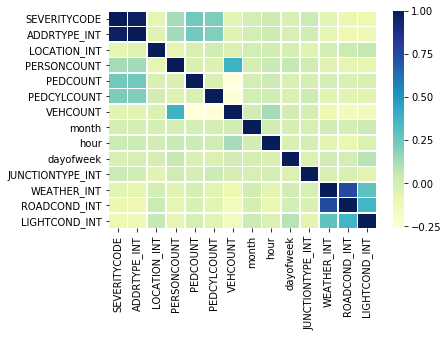

In [83]:
sns.heatmap(df_new.corr(),linewidths=.5,cmap="YlGnBu")


<H1>Results </H1>
    
From the above heatmap, one can observe the correlation between severity code and address type as most of the injury collisions happen in address types blocks and intersection while nearly three-fourths of the property damage collisions happen in blocks.
Also there is a correltion between person count and vehicle count which is not surprising as more the number of vehicles, the more the number of likely passengers and people involved in accident. Also weather, road conditions and light conditions have strong correlations which is unsurprising as weather impacts road conditions as well as light conditions.


<H1>Discussion </H1>

From the analysed data one can observe that 
<ul>The likelihood of property damage collisions is twice as more likely than injury collisions. </ul>
<ul>Collisions are more likely to happen under high visibility conditions like daylight or dark with streetlights.</ul>
<ul>Collisions are more likely when two vehicles are involved.</ul>
<ul>Most accidents occur on a Friday. Hence traffic officials and people need to be more vigilant on that day of the week. </ul>
<ul>Both Injury and Property damage only collisions are frequently occurring at Intersection (intersection related), Mid-Block (not related to intersection) and Mid-Block (but intersection related). Highly visible warning signs, traffic signals needs to be put up at such locations. </ul>
<ul>There are some locations which are more prone to injury collisions but property damage related collisions seem to be evenly distributed between locations. Proper and highly visible warning signs,traffic signals needs to be put up at accident prone  locations.</ul>
<ul>Accidents happen more commonly during clear weather, followed by rainy and overcast weather. The road conditions also vary accordingly. Hence, the driver needs to be more vigilant during such weather and road conditions.</ul>

<H1>Conclusion </H1>

Drivers, people and traffic officials need be more vigilant about accidents at certain locations, address types, weather, 
junctions and on particular days of the week. Accordingly, resources of the traffic department can be judiciously allocated so 
that the number of traffic accidents can be reduced. Additionally studies may be done to analyze why certain locations are 
prone to accidents, for instance whether it is due to faulty road design, alignment, etc and how the accidents at such locations 
can be reduced.